In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# sklearn - scikit-learn

In [3]:
df = pd.read_csv('headbrain.csv')

In [4]:
df.shape

(237, 4)

In [7]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [10]:
X[:5]

array([4512, 3738, 4261, 3777, 4177], dtype=int64)

In [11]:
y[:5]

array([1530, 1297, 1335, 1282, 1590], dtype=int64)

In [12]:
# 1. Mean of X and Y
# 2. Slope
# 3. Intercept
# 4. Predictions
# 5. Error (MSE - Mean Squared Error)
# 6. Optimization (Gradient Descent)

In [13]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [14]:
numer = 0
denom = 0
n = len(X)

for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
slope = numer / denom
intercept = mean_y - slope * mean_x

In [15]:
slope, intercept

(0.26342933948939945, 325.57342104944223)

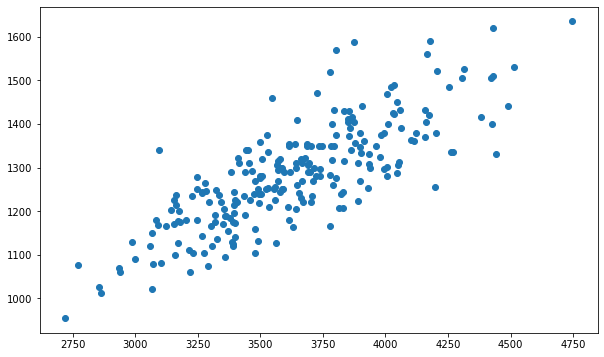

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()

In [17]:
predictions = []
for i in range(n):
    y_pred = slope * X[i] + intercept
    predictions.append(int(y_pred))

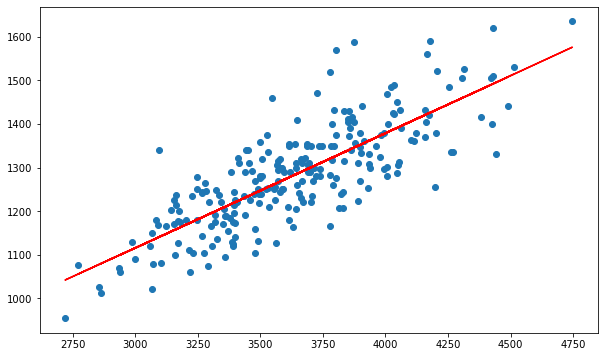

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'red')
plt.show()

In [19]:
y[:10]

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375],
      dtype=int64)

In [20]:
predictions[:10]

[1514, 1310, 1448, 1320, 1425, 1269, 1322, 1263, 1277, 1374]

In [21]:
error = 0
for i in range(n):
    error += (predictions[i] - y[i]) ** 2
    
mse = error/n
print("MSE",mse)

MSE 5202.9029535864975


In [22]:
rmse = np.sqrt(mse)
print("RMSE",rmse)

RMSE 72.13115106239812


In [26]:
# import scipy.io

In [25]:
# mat = scipy.io.loadmat('file_path')

In [27]:
# Data Preprocessing
# - Feature Scaling (Normalization/Standardization)
# - Label Encoding
# - Train Test Split

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
minmax = MinMaxScaler()

In [31]:
X = X.reshape((-1,1))
y = y.reshape((-1,1))

scaled_x = minmax.fit_transform(X)
scaled_y = minmax.fit_transform(y)

In [32]:
scaled_x[:5]

array([[0.88406512],
       [0.50222003],
       [0.7602368 ],
       [0.52146029],
       [0.71879625]])

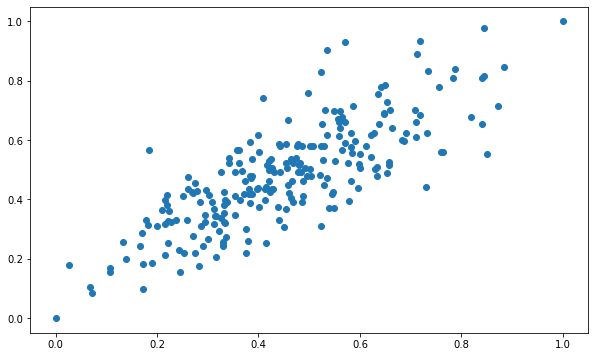

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(scaled_x, scaled_y)
plt.show()

In [36]:
def gradient(x,y,epochs,alpha):
    slope = 0
    intercept = 0
    for epoch in range(epochs):
        y_pred = slope * x + intercept
        loss = y_pred - y
        grad_slope = (2/n) * np.dot(loss.T, x)
        grad_inter = (2/n) * np.sum(loss)
        slope = slope - grad_slope * alpha
        intercept = intercept - grad_inter * alpha
    return slope, intercept

In [63]:
epochs = 10000
alpha = 0.01
slope, intercept = gradient(scaled_x, scaled_y, epochs, alpha)

In [64]:
slope = slope[0][0]

In [65]:
slope

0.7824164623609703

In [66]:
intercept

0.12940368086748405

In [67]:
predictions = []
for i in range(n):
    y_pred = slope * scaled_x[i] + intercept
    predictions.append(y_pred)

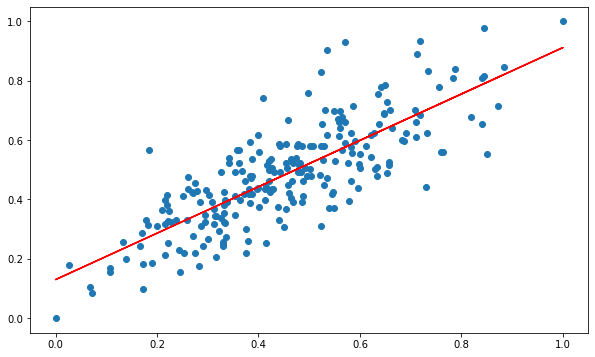

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(scaled_x,scaled_y)
plt.plot(scaled_x,predictions,'red')
plt.show()

In [69]:
error = 0
for i in range(n):
    error += (predictions[i] - scaled_y[i]) ** 2
    
mse = error/n
print("MSE",mse)

MSE [0.01124893]
